In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
X=pd.read_csv("C:/Users/SIDDHARTH/desktop/ML and Data Science/Chemicals Classifier Logistic Regression/Logistic_X_Train.csv")
Y=pd.read_csv("C:/Users/SIDDHARTH/desktop/ML and Data Science/Chemicals Classifier Logistic Regression/Logistic_Y_Train.csv")

In [6]:
X_test=pd.read_csv("C:/Users/SIDDHARTH/desktop/ML and Data Science/Chemicals Classifier Logistic Regression/Logistic_X_Test.csv")

In [7]:
print(X.shape,Y.shape,X_test.shape)

(3000, 3) (3000, 1) (1000, 3)


In [8]:
X_train=X.values
Y_train=Y.values
print(X_train.shape,Y_train.shape)

(3000, 3) (3000, 1)


In [9]:
u=np.mean(X_train,axis=0)
std=np.std(X_train,axis=0)
X_train=(X_train-u)/std
X_test=(X_test-u)/std

In [10]:
dfx=pd.DataFrame(X_train)
dfx.head()

,0,1,2
0,-0.934713,-0.244397,-0.461404
1,-0.782301,-0.193273,-1.085866
2,-0.467071,0.566811,-1.175348
3,0.995958,0.341282,1.161012
4,0.488391,0.293775,0.448268


In [11]:
dfy=pd.DataFrame(Y_train)
dfy.head()

,0
0,1
1,1
2,1
3,0
4,0


In [12]:
dfx_test=pd.DataFrame(X_test)
dfx_test.head()

,f1,f2,f3
0,-0.580967,-1.231970,-2.103862
1,-0.936421,0.439311,-0.365960
2,1.437735,0.910902,1.085811
3,-0.978854,0.049307,-0.460415
4,-0.728806,-0.059782,-1.005340


c:\users\siddharth\python38\lib\site-packages\matplotlib\collections.py:922: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


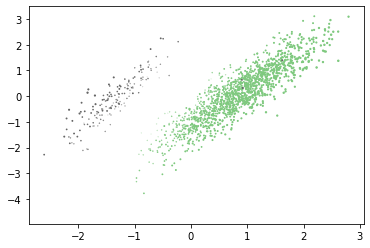

In [13]:
plt.scatter(X_train[:,0],X_train[:,1],X_train[:,2],c=Y_train,cmap=plt.cm.Accent)
plt.show()

In [14]:
X_train.mean(axis=0)

array([ 9.47390314e-18, -4.50010399e-17, -1.65793305e-17])

In [15]:
X_train.std(axis=0)

array([1., 1., 1.])

In [16]:
def sigmoid(x):
    return 1.0/(1.0+np.exp(-x))

In [17]:
def hypothesis(X,theta):
    return sigmoid(np.dot(X,theta))

In [18]:
def error(X,Y,theta):
    err=0
    m=X.shape[0]
    hi=hypothesis(X,theta)
    err=-1*(np.sum(Y*np.log(hi) + (1-Y)*np.log(1-hi)))
    return err/m

In [19]:
def gradient(X,Y,theta):
    m=X.shape[0]
    hi=hypothesis(X,theta)
    grad=np.dot(X.T,(Y-hi))
    return grad/m

In [20]:
def GradientDescent(X,Y,lr=0.5,max_itr=1000):
    n=X.shape[1]
    theta=np.zeros((n,1))
    error_list=[]
    for i in range(max_itr):
        err=error(X,Y,theta)
        error_list.append(err)
        grad=gradient(X,Y,theta)
        theta=theta + lr*grad
    return theta,error_list

In [21]:
ones=np.ones((X_train.shape[0],1))
X_new_train=np.hstack((ones,X_train))
print(X_new_train.shape)

(3000, 4)


In [22]:
theta,Errorlist = GradientDescent(X_new_train,Y_train)

In [23]:
theta

array([[-1.07616924],
       [-4.76226471],
       [ 2.9484687 ],
       [-2.92705507]])

In [25]:
Errorlist

[0.6931471805599454,
 0.5528185995697726,
 0.46214510273000226,
 0.3997933508197263,
 0.35434743305234123,
 0.3196686549907838,
 0.29225598799310476,
 0.26998404815533406,
 0.25149023622580574,
 0.23586022505698603,
 0.22245679030578125,
 0.21082153662701367,
 0.20061577829602656,
 0.19158350949268477,
 0.18352738669181234,
 0.1762926711031784,
 0.16975620461248173,
 0.16381866282874177,
 0.15839899750602948,
 0.15343037562339995,
 0.14885716281333225,
 0.14463264910281912,
 0.14071731115542876,
 0.13707746817601918,
 0.13368423067731985,
 0.13051266988149535,
 0.12754115527628415,
 0.1247508217004773,
 0.12212513719214357,
 0.11964954993931348,
 0.11731119785700984,
 0.1150986681388479,
 0.11300179698204628,
 0.11101150183020676,
 0.10911964010774655,
 0.10731888966805797,
 0.10560264714123556,
 0.10396494111696891,
 0.10240035768562238,
 0.10090397632384666,
 0.09947131447882843,
 0.09809827949894975,
 0.09678112679446187,
 0.0955164233021977,
 0.09430101548288466,
 0.093132001205657

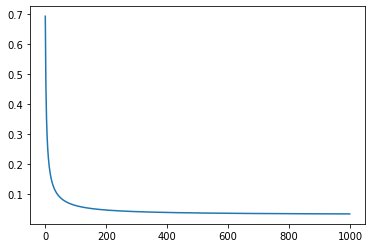

In [26]:
plt.plot(Errorlist)
plt.show()

c:\users\siddharth\python38\lib\site-packages\matplotlib\collections.py:922: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


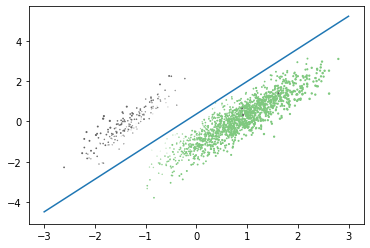

In [27]:
x1 = np.arange(-3,4)
x2 = -(theta[0] + theta[1]*x1)/theta[2]
plt.plot(x1,x2)
plt.scatter(X_train[:,0],X_train[:,1],X_train[:,2],c=Y_train,cmap=plt.cm.Accent)
plt.show()

In [28]:
def predict(X,theta):
    h=hypothesis(X,theta)
    output=np.zeros(h.shape)
    output=output.astype('int')
    output[h>=0.5] = 1
    return output

In [29]:
ones=np.ones((X_test.shape[0],1))
X_new_test=np.hstack((ones,X_test))
print(X_new_test.shape)

(1000, 4)


In [30]:
preds = predict(X_new_test,theta)
print(preds.shape)

(1000, 1)


In [31]:
df=pd.DataFrame(data=preds,columns=['label'])
df.head()

,label
0,1
1,1
2,0
3,1
4,1
